In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import cv2
import preprocess as pp
from preprocess import randint
import sys
from glob import glob

np.set_printoptions(threshold=sys.maxsize)

# 아래의 코드는 엣지를 0으로 만든 Flaw 성분값을 유지하여 저장하는 코드입니다. (누끼아님)

In [3]:
image_list = glob("/home/VirtualFlaw/Hyun/Data/Flaw/10pixel_padding" + '/**', recursive=True)
save_path = "/home/VirtualFlaw/Hyun/Data/Flaw/flaw_info/"
for image in image_list:
    if image.endswith('.jpg'):
        flaw = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        if flaw.shape[0] == flaw.shape[1]:
            flaw = cv2.subtract(flaw, int(max([np.max(flaw[0]), np.max(flaw[-1]), np.max(flaw[:,0]), np.max(flaw[:,-1])])))
            np.save(save_path+image.split("/")[-1][:-4], flaw)
            
            
            

# 아래의 코드는 엣지를 0으로 만든 Flaw 성분값을 원상복구하여 저장하는 코드입니다. (누끼)

In [4]:
image_list = glob("/home/VirtualFlaw/Hyun/Data/Flaw/10pixel_padding" + '/**', recursive=True)
save_path = "/home/VirtualFlaw/Hyun/Data/Flaw/flaw_info_2/"
for image in image_list:
    if image.endswith('.jpg'):
        flaw = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        flaw_origin = flaw.copy()
        if flaw.shape[0] == flaw.shape[1]:
            flaw = cv2.subtract(flaw, int(max([np.max(flaw[0]), np.max(flaw[-1]), np.max(flaw[:,0]), np.max(flaw[:,-1])])))
            flaw = np.where(flaw > 0, 1, 0)
            flaw = flaw_origin * flaw
            np.save(save_path+image.split("/")[-1][:-4], flaw)
        



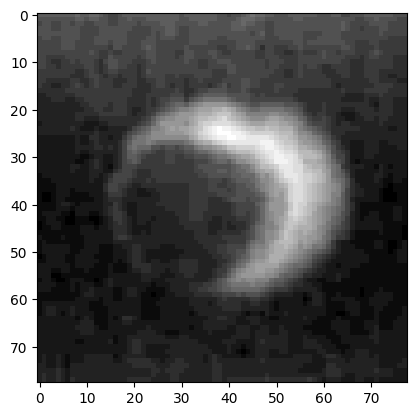

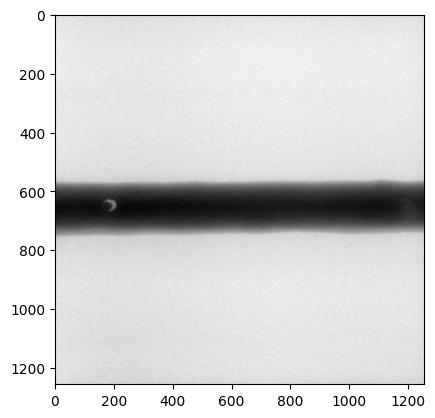

In [2]:
plt.imshow(cv2.imread("/home/VirtualFlaw/Hyun/Data/Flaw/10pixel_padding/PO/22D017-07-023-1st-1-(2)-5-R-PO_0.jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')

plt.figure()
plt.imshow(cv2.imread("/home/VirtualFlaw/Data/Raw_jpg/202211/22D017-07-023/22D017-07-023-1st-1-(2)-5-R-PO.jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')

(78, 78)
(78, 78)


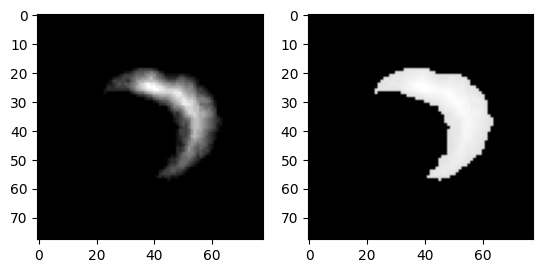

In [4]:
image_1 = np.load("/home/VirtualFlaw/Hyun/Data/Flaw/flaw_info/22D017-07-023-1st-1-(2)-5-R-PO_0.npy")
image_2 = np.load("/home/VirtualFlaw/Hyun/Data/Weld/PO/22D017-07-023-1st-1-(2)-5-R-PO_0.npy")
plt.subplot(1,2,1)
plt.imshow(image_1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image_2, cmap='gray')
print(image_1.shape)
print(image_2.shape)

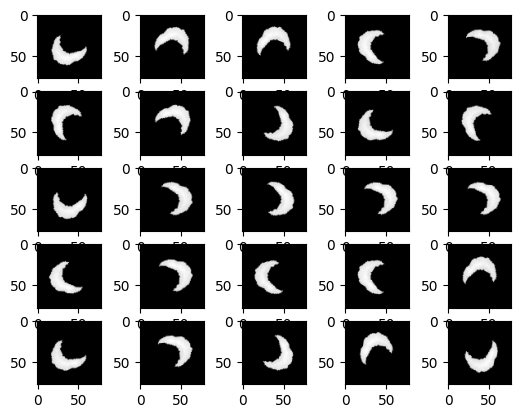

In [5]:
height, width = image_2.shape
virtual_flaw = np.zeros((height, width), dtype=np.int8)

sigma = 1
for time in range(25):
    for i in range(height):
        for j in range(width):
            if image_2[i][j] != 0:
                virtual_flaw[i][j] = np.random.normal(image_2[i][j], sigma)
            else:
                virtual_flaw[i][j] = 0
                
               
            if virtual_flaw[i][j] >= 250:
                virtual_flaw[i][j] = 0
            elif virtual_flaw[i][j] <= 0:
                virtual_flaw[i][j] = 0
                
    #data type 변환
    virtual_flaw = virtual_flaw.astype(np.uint8)
    #random rotation
    angle = randint(0, 360)
    M = cv2.getRotationMatrix2D((virtual_flaw.shape[1]/2, virtual_flaw.shape[0]/2), angle, 1)
    virtual_flaw = cv2.warpAffine(virtual_flaw, M, (virtual_flaw.shape[1], virtual_flaw.shape[0]))
    plt.subplot(5,5,time+1)
    plt.imshow(virtual_flaw, cmap='gray')




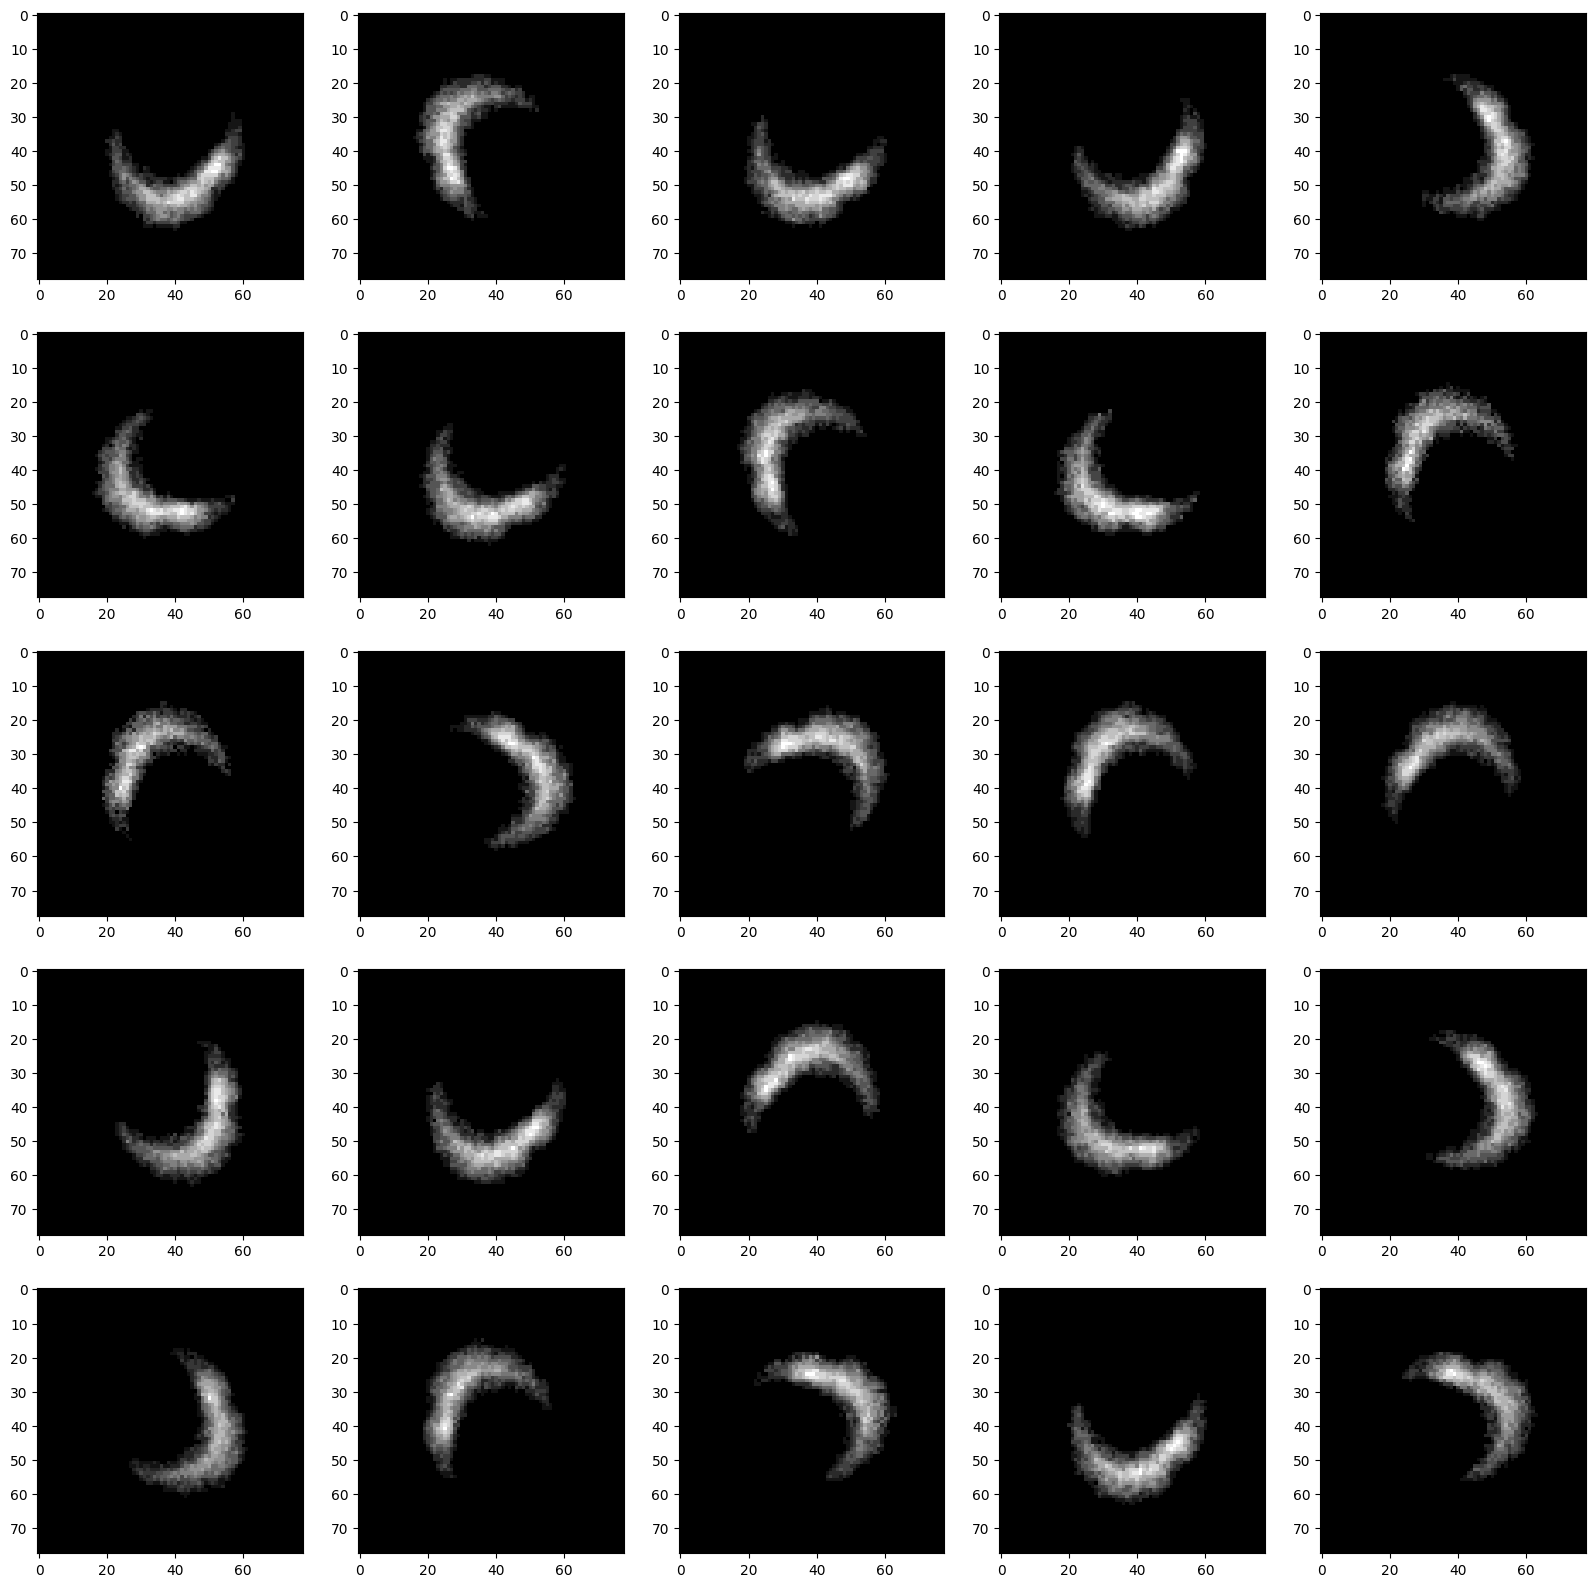

In [11]:
height, width = image_1.shape
virtual_flaw = np.zeros((height, width), dtype=np.int8)
sigma = 1
plt.figure(figsize=(20,20))
for time in range(25):
    for i in range(height):
        for j in range(width):
            if image_1[i][j] != 0:
                virtual_flaw[i][j] = np.random.normal(image_1[i][j], sigma)
            else:
                virtual_flaw[i][j] = 0
                
            if virtual_flaw[i][j] >= 250:
                virtual_flaw[i][j] = 0
            elif virtual_flaw[i][j] <= 0:
                virtual_flaw[i][j] = 0
                
    #data type 변환
    virtual_flaw = virtual_flaw.astype(np.uint8)
    #random rotation
    angle = randint(0, 360)
    M = cv2.getRotationMatrix2D((virtual_flaw.shape[1]/2, virtual_flaw.shape[0]/2), angle, 1)
    virtual_flaw = cv2.warpAffine(virtual_flaw, M, (virtual_flaw.shape[1], virtual_flaw.shape[0]))
    
    
    
            
    plt.subplot(5,5,time+1)
    plt.imshow(virtual_flaw, cmap='gray')
    


    
    

# 아래는 랜덤 위치에 virtual flaw를 "더하는" 코드입니다. 

(604, 778)
628 993
78 78


False

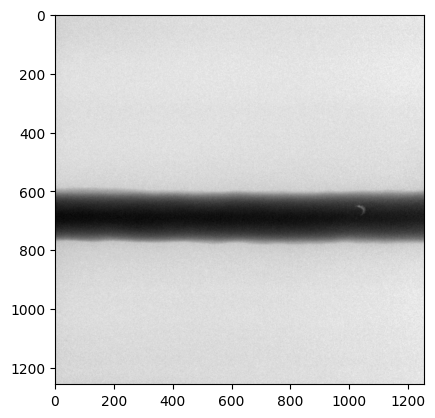

In [12]:
image = "/home/VirtualFlaw/Data/Raw_jpg/202211/22D017-07-023/22D017-07-023-1st-1-(1)-28.jpg"
image = pp.WeldImage(image)
weld = image.weld
print(weld)

#y = randint(y1, y2)
y = 628
x = randint(0, 1256)
flaw_y = virtual_flaw.shape[0]
flaw_x = virtual_flaw.shape[1]
print(y, x)
print(flaw_y, flaw_x)
#add Virtual Flaw
image.image[y:y+flaw_y, x:x+flaw_x] = image.image[y:y+flaw_y, x:x+flaw_x] + virtual_flaw
plt.imshow(image.image, cmap='gray')
cv2.imwrite("/home/VirtualFlaw/Hyun/Data/temp_result/22D017-07-023-1st-1-(1)-28.jpg", image.image)

# 해당 코드는 랜덤 위치에 virtual flaw를 "치환하는" 코드입니다.

(604, 778)
628 666
78 78


True

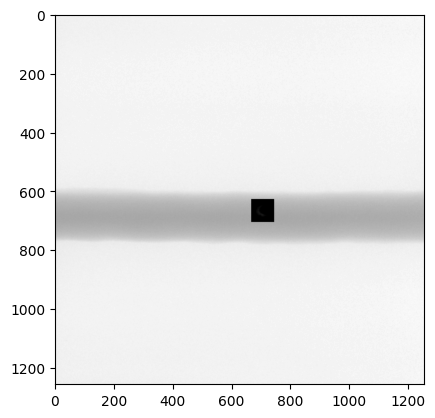

In [16]:
image = "/home/VirtualFlaw/Data/Raw_jpg/202211/22D017-07-023/22D017-07-023-1st-1-(1)-28.jpg"
image = pp.WeldImage(image)
weld = image.weld
print(weld)

y = 628
x = randint(0, 1256)
flaw_y = virtual_flaw.shape[0]
flaw_x = virtual_flaw.shape[1]
print(y, x)
print(flaw_y, flaw_x)
#add Virtual Flaw
image.image[y:y+flaw_y, x:x+flaw_x] = virtual_flaw
plt.imshow(image.image, cmap='gray')
cv2.imwrite("/home/VirtualFlaw/Hyun/Data/temp_result/22D017-07-023-1st-1-(1)-28.jpg", image.image)

# 해당 코드는 랜덤 위치에 virtual flaw의 누끼"만 치환하는" 코드입니다.

(604, 778)


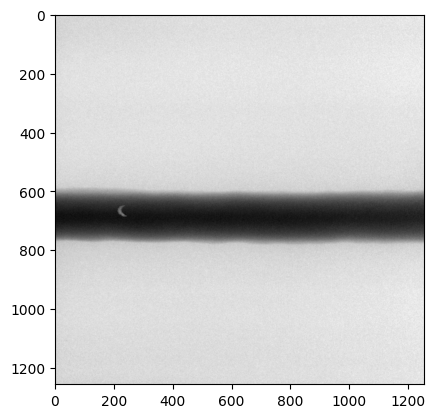

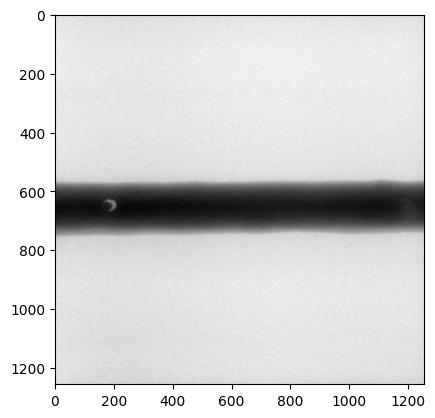

In [18]:
image = "/home/VirtualFlaw/Data/Raw_jpg/202211/22D017-07-023/22D017-07-023-1st-1-(1)-28.jpg"
image = pp.WeldImage(image)
weld = image.weld
print(weld)

y = 628
x = randint(0, 1256)
flaw_y = virtual_flaw.shape[0]
flaw_x = virtual_flaw.shape[1]
mean = np.mean(virtual_flaw)
max = np.max(virtual_flaw)
for i in range(flaw_y):
    for j in range(flaw_x):
        if virtual_flaw[i][j] > max-max/4:
            image.image[y+i][x+j] = virtual_flaw[i][j]
            
plt.imshow(image.image, cmap='gray')

cv2.imwrite("/home/VirtualFlaw/Hyun/Data/temp_result/22D017-07-023-1st-1-(1)-28.jpg", image.image)

plt.figure()
plt.imshow(cv2.imread("/home/VirtualFlaw/Data/Raw_jpg/202211/22D017-07-023/22D017-07-023-1st-1-(2)-5-R-PO.jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')
